In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('voice-classification.csv')
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [4]:
df['label'].unique()

array(['male', 'female'], dtype=object)

In [5]:
df1=df.copy()
df1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [6]:
df1.loc[df1['label']=='male', 'label']=1
df1.loc[df1['label']=='female', 'label']=2
df1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,2
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,2
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,2
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,2


In [7]:
df1.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df1["label"] = pd.to_numeric(df1["label"])

In [9]:
df1.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int64
dtype: object

In [10]:
features=df1.drop(['label'],axis=1)
target=df1[['label']]
print(features.shape ,' ',target.shape)

(3168, 20)   (3168, 1)


In [11]:
X_train , X_test, y_train, y_test = train_test_split(features, target, random_state = 10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 20)
(792, 20)
(2376, 1)
(792, 1)


In [13]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=2)

In [14]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [15]:
params = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,10], 'splitter' :['best', 'random']}

In [16]:
grid_search = GridSearchCV(DT_model, params, cv = 3, n_jobs = -1)

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 10],
                         'splitter': ['best', 'random']})

In [18]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [19]:
DT_model = DecisionTreeClassifier(criterion='gini', random_state=2, max_depth = 3, splitter = 'best')

In [20]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [21]:
preds = DT_model.predict(X_test)

In [22]:
accuracy_score(y_test, preds)

0.9671717171717171

In [23]:
print(confusion_matrix(y_test, preds, ))

[[397  11]
 [ 15 369]]


In [24]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       408
           2       0.97      0.96      0.97       384

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



In [25]:
rf_classifier = RandomForestClassifier()

In [26]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
predictions = rf_classifier.predict(X_test)

In [28]:
print(accuracy_score(y_test, predictions))

0.9835858585858586


In [29]:
print(confusion_matrix(y_test, predictions))

[[403   5]
 [  8 376]]


In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       408
           2       0.99      0.98      0.98       384

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [31]:
vt_clf = VotingClassifier(estimators=[('dt', DT_model), ('rf', rf_classifier)],
                            voting = 'hard')

In [32]:
vt_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=2)),
                             ('rf', RandomForestClassifier())])

In [33]:
y_pred = vt_clf.predict(X_test)

In [34]:
score = accuracy_score(y_test, y_pred)
print("Voting Score ",score)

Voting Score  0.9734848484848485


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       408
           2       0.99      0.96      0.97       384

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



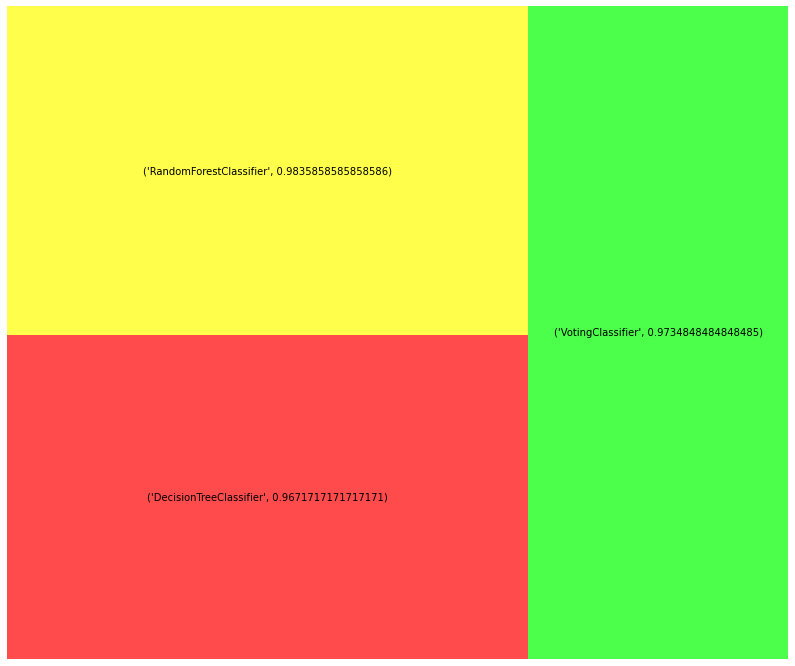

In [36]:
import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(['DecisionTreeClassifier','RandomForestClassifier',
'VotingClassifier']),[accuracy_score(y_test, preds),accuracy_score(y_test, predictions),accuracy_score(y_test, y_pred)])
squarify.plot(sizes=[accuracy_score(y_test, preds),
accuracy_score(y_test, predictions),accuracy_score(y_test, y_pred)], label=label, alpha=0.7,color=['red','yellow','lime'])
plt.axis('off')
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbc_clf = GradientBoostingClassifier()

In [40]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
y_pred = gbc_clf.predict(X_test)
print('Accuracy : ',accuracy_score(y_pred, y_test))
print('Estimators : ',gbc_clf.n_estimators_)

Accuracy :  0.9835858585858586
Estimators :  100


In [42]:
params = {'n_estimators' : [10, 80, 100, 120],
          'learning_rate' : [0.1, 0.3, 1.0],
          'subsample' :  [0.50, 0.55, 0.8]}

In [43]:
grd_gbc_clf = GridSearchCV(gbc_clf, params)

In [44]:
grd_gbc_clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 1.0],
                         'n_estimators': [10, 80, 100, 120],
                         'subsample': [0.5, 0.55, 0.8]})

In [45]:
grd_gbc_clf.best_params_

{'learning_rate': 0.3, 'n_estimators': 120, 'subsample': 0.8}

In [46]:
pred_using_GS = grd_gbc_clf.predict(X_test)

In [47]:
import xgboost, time

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_clf = xgboost.XGBClassifier()

In [ ]:
start = time.time()
xgb_clf.fit(X_train, y_train)
end = time.time()

time_elapsed = end - start
print(time_elapsed)

In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
params = {'n_estimators':[100, 200, 400, 800], 'max_depth':[1,2,3,6,10], 'learning_rate' :[0.1, 0.2, 0.3, 0.5], 'min_child_weight' : [1, 2, 3, 4, 5], 'subsample' : [0.5, 0.6, 0.7, 0.8, 1.0]}
grid_search = GridSearchCV(xgb_clf, params, cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
xgb_clf = xgboost.XGBClassifier(learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 200, subsample = 0.6)

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_pred, y_test)